In [14]:
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv("./metrics-java-10-30-2.csv")


In [16]:
test_wall_time_min = df['startTime'].min()
test_wall_time_max = df['startTime'].max()

# Calculate the number of seconds to cover the entire test duration
num_seconds = int((test_wall_time_max - test_wall_time_min) / 1000) + 1

# Initialize lists to store x-axis (time) and y-axis (throughput) values
x_values = list(range(num_seconds))  # Seconds from 0 to test wall time
y_values = []

In [17]:
# Iterate over each second of the test duration, calculate the throughput for each second, and append it to the y-axis values list
for second in x_values:
    # Calculate the time range for this second
    start_time_range = test_wall_time_min + second * 1000  # Start time of the second in milliseconds
    end_time_range = test_wall_time_min + (second + 1) * 1000  # End time of the second in milliseconds
    
    # Filter rows that occurred within this time range
    filtered_data = df[(df['startTime'] >= start_time_range) & (df['startTime'] < end_time_range)]
    throughput = filtered_data.shape[0]  # Number of requests in this second
    y_values.append(throughput)

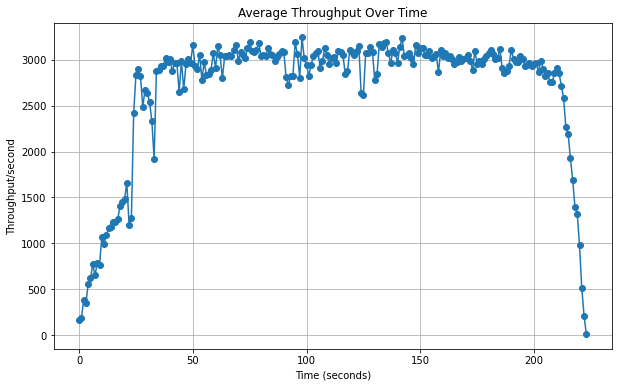

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel("Time (seconds)")
plt.ylabel("Throughput/second")
plt.title("Average Throughput Over Time")
plt.grid(True)
plt.show()